### Import libraries

In [1]:
import matplotlib.pyplot as plt
from helpers import *

### Comparison of Crude Monte Carlo with the MCLS estimator on the one-dimensional case

In [2]:
def f(x):
    return 1 / (25 * x ** 2 + 1)

Reference value for $I_1$

In [3]:
I_1 = 1/5 * np.arctan(5)

Estimation of $I_{1}$ by Crude Monte Carlo and by $MCLS$ estimator for fixed values of $n$

In [4]:
M_grid = 200 * np.arange(1, 26)
errors_CMC = []
errors_CV_10 = []
errors_CV_20 = []
errors_CV_40 = []
errors_random = []
conds_CV_10 = []
conds_CV_20 = []
conds_CV_40 = []
for M in M_grid:
    estimate_CMC, error_CMC = crude_monte_carlo(f, M, I_1)
    _, error_CV_10, cond_CV_10 = interpolation_estimator(10, f, M, I_1)
    _, error_CV_20, cond_CV_20 = interpolation_estimator(20, f, M, I_1)
    _, error_CV_40, cond_CV_40 = interpolation_estimator(40, f, M, I_1)
    _, error_random = randomized_midpoint(f, M, I_1)
    errors_CMC.append(error_CMC)
    errors_CV_10.append(error_CV_10)
    errors_CV_20.append(error_CV_20)
    errors_CV_40.append(error_CV_40)
    errors_random.append(error_random)
    conds_CV_10.append(cond_CV_10)
    conds_CV_20.append(cond_CV_20)
    conds_CV_40.append(cond_CV_40)

Plot of the condition numbers for $n = 10$, $n = 20$ and $n = 40$

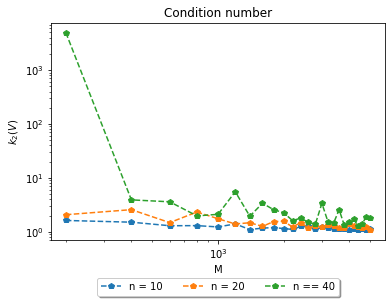

In [5]:
plt.loglog(M_grid, np.array(conds_CV_10), 'p--', label="n = 10")
plt.loglog(M_grid, np.array(conds_CV_20), 'p--', label="n = 20")
plt.loglog(M_grid, np.array(conds_CV_40), 'p--', label="n == 40")
plt.xlabel("M")
plt.ylabel("$k_2(V)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Condition number")
plt.show()

Plot of the errors for $n = 0$, $n = 10$, $n = 20$, $n = 40$

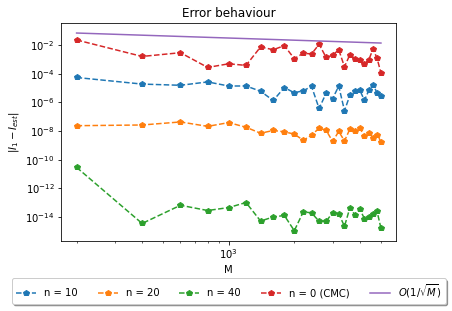

In [6]:
plt.loglog(M_grid, np.array(errors_CV_10), 'p--', label="n = 10")
plt.loglog(M_grid, np.array(errors_CV_20), 'p--', label="n = 20")
plt.loglog(M_grid, np.array(errors_CV_40), 'p--', label="n = 40")
plt.loglog(M_grid, np.array(errors_CMC), 'p--', label="n = 0 (CMC)")
plt.loglog(M_grid, np.array(1/np.sqrt(M_grid)), label="$O(1/\sqrt{M})$")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

Comparison with the randomized midpoint quadrature estimator: we see that for $\sim n > 10$ we are already outperforming it

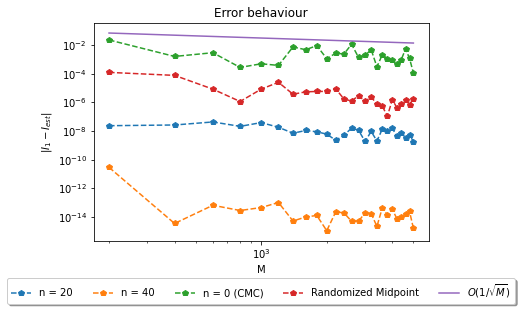

In [7]:
plt.loglog(M_grid, np.array(errors_CV_20), 'p--', label="n = 20")
plt.loglog(M_grid, np.array(errors_CV_40), 'p--', label="n = 40")
plt.loglog(M_grid, np.array(errors_CMC), 'p--', label="n = 0 (CMC)")
plt.loglog(M_grid, np.array(errors_random), 'p--', label="Randomized Midpoint")
plt.loglog(M_grid, np.array(1/np.sqrt(M_grid)), label="$O(1/\sqrt{M})$")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

Estimation of $I_{1}$ by $MCLS$ estimator for $n$ as a function of $M$

In [8]:
M_grid = 100 * np.arange(1, 11)
errors_CV_root_M = []
errors_CV_M_halfs = []
errors_CV_M_over_log_M = []
errors_CV_M_log_M = []
conds_CV_root_M = []
conds_CV_M_halfs = []
conds_CV_M_over_log_M = []
conds_CV_M_log_M = []
for M in M_grid:
    _, error_CV_root_M, cond_CV_root_M = interpolation_estimator(int(np.sqrt(M)), f, M, I_1)
    _, error_CV_M_halfs, cond_CV_M_halfs = interpolation_estimator(int(M/2), f, M, I_1)
    _, error_CV_M_over_log_M, cond_CV_M_over_log_M = interpolation_estimator(int(M/np.log10(M)), f, M, I_1)
    _, error_CV_M_log_M, cond_CV_M_log_M = interpolation_estimator(int(M * np.log10(M)), f, M, I_1)
    _, error_random = randomized_midpoint(f, M, I_1)
    errors_CV_root_M.append(error_CV_root_M)
    errors_CV_M_halfs.append(error_CV_M_halfs)
    errors_CV_M_log_M.append(error_CV_M_log_M)
    errors_CV_M_over_log_M.append(error_CV_M_over_log_M)
    conds_CV_root_M.append(cond_CV_root_M)
    conds_CV_M_halfs.append(cond_CV_M_halfs)
    conds_CV_M_over_log_M.append(cond_CV_M_over_log_M)

Plot of the condition numbers for $n = [\sqrt{M}]$, $n = [\frac{M}{2}]$ and $n = [\frac{M}{\log(M)}]$

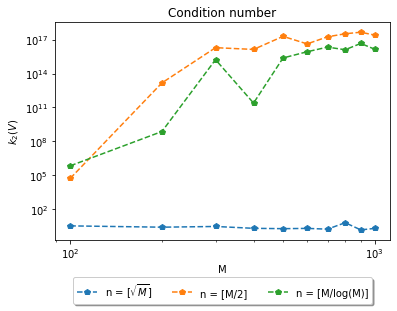

In [9]:
plt.loglog(M_grid, np.array(conds_CV_root_M), 'p--', label="n = [$\sqrt{M}$]")
plt.loglog(M_grid, np.array(conds_CV_M_halfs), 'p--', label="n = [M/2]")
plt.loglog(M_grid, np.array(conds_CV_M_over_log_M), 'p--', label="n = [M/log(M)]")
plt.xlabel("M")
plt.ylabel("$k_2(V)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Condition number")
plt.show()

Plot of the errors for $n = [\sqrt{M}]$, $n = [\frac{M}{2}]$ and $n = [\frac{M}{\log(M)}]$ and $n = [M \log(M)]$

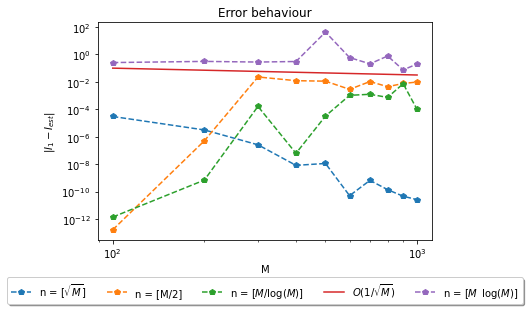

In [10]:
plt.loglog(M_grid, np.array(errors_CV_root_M), 'p--', label="n = [$\sqrt{M}$]")
plt.loglog(M_grid, np.array(errors_CV_M_halfs), 'p--', label="n = [M/2]")
plt.loglog(M_grid, np.array(errors_CV_M_over_log_M), 'p--', label="n = $[M / \log(M)]$")
plt.loglog(M_grid, np.array(1/np.sqrt(M_grid)), label="$O(1/\sqrt{M})$")
plt.loglog(M_grid, np.array(errors_CV_M_log_M), 'p--', label="n = $[M \hspace{0.5} \log(M)]$")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

### QMCLS estimator: we draw the samples in one dimension as the same used for the randomized midpoint

In [11]:
M_grid = 200 * np.arange(1, 26)
errors_CV_0_s = []
errors_CV_20_s = []
errors_CV_40_s = []
errors_CV_M_2_s = []
errors_CV_M_over_log_M_s = []
conds_CV_M_2_s = []
conds_CV_M_over_log_M_s = []
for M in M_grid:
    _, errs, conds = interpolation_estimator(0, f, M, I_1, QMC=True)
    errors_CV_0_s.append(errs)
    _, errs, conds = interpolation_estimator(20, f, M, I_1, QMC=True)
    errors_CV_20_s.append(errs)
    _, errs, conds = interpolation_estimator(40, f, M, I_1, QMC=True)
    errors_CV_40_s.append(errs)
    _, errs, conds = interpolation_estimator(int(M/2), f, M, I_1, QMC=True)
    errors_CV_M_2_s.append(errs)
    conds_CV_M_2_s.append(conds)
    _, errs, conds = interpolation_estimator(int(M/np.log10(M)), f, M, I_1, QMC=True)
    errors_CV_M_over_log_M_s.append(errs)
    conds_CV_M_over_log_M_s.append(conds)

Plot of the errors for $n = 0$, $n = 20$ and $n = 40$

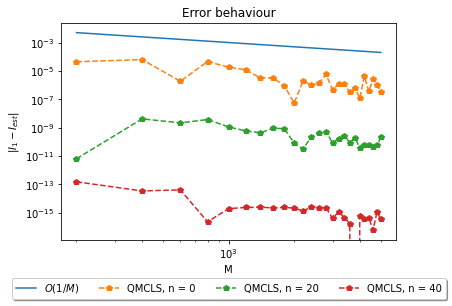

In [12]:
plt.loglog(M_grid, 1/M_grid, label="$O(1/M)$")
plt.loglog(M_grid, errors_CV_0_s, 'p--', label="QMCLS, n = 0")
plt.loglog(M_grid, errors_CV_20_s, 'p--', label="QMCLS, n = 20")
plt.loglog(M_grid, errors_CV_40_s, 'p--', label="QMCLS, n = 40")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

Plot of the condition numbers for $n = [\frac{M}{2}]$ and $n = [\frac{M}{\log(M)}]$

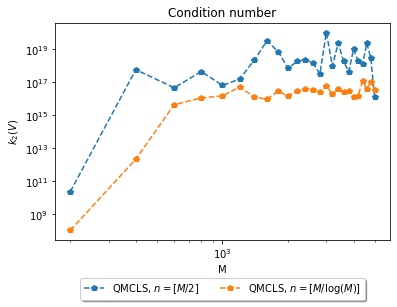

In [13]:
plt.loglog(M_grid, conds_CV_M_2_s, 'p--', label="QMCLS, $n = [M/2]$")
plt.loglog(M_grid, conds_CV_M_over_log_M_s, 'p--', label="QMCLS, $n = [M / \log(M)]$")
plt.xlabel("M")
plt.ylabel("$k_2(V)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Condition number")
plt.show()

### MCLS estimator with importance sampling

In [14]:
def w(x, n):
    degs = np.arange(n+1)
    degs = degs[..., np.newaxis]
    x = x[..., np.newaxis].T
    poly = ((np.sqrt(2 * degs + 1) * eval_sh_legendre(degs, x)) ** 2).T
    return (n+1) / np.sum(poly, axis=1)

Estimation of $I_{1}$ by $MCLS$ estimator with importance sampling for fixed values of $n$

In [15]:
M_grid = 100 * np.arange(1, 11)
errors_CV_0 = []
errors_CV_10 = []
errors_CV_20 = []
errors_CV_40 = []
conds_CV_10 = []
conds_CV_20 = []
conds_CV_40 = []
for M in M_grid:
    _, error_CV_0, cond_CV_0, _ = importance_sampling_estimator(0, f, w, M, I_1)
    _, error_CV_10, cond_CV_10, _ = importance_sampling_estimator(10, f, w, M, I_1)
    _, error_CV_20, cond_CV_20, _ = importance_sampling_estimator(20, f, w, M, I_1)
    _, error_CV_40, cond_CV_40, _ = importance_sampling_estimator(40, f, w, M, I_1)
    errors_CV_0.append(error_CV_0)
    errors_CV_10.append(error_CV_10)
    errors_CV_20.append(error_CV_20)
    errors_CV_40.append(error_CV_40)
    conds_CV_10.append(cond_CV_10)
    conds_CV_20.append(cond_CV_20)
    conds_CV_40.append(cond_CV_40)

Accepted 12 out of 100
Concatenate 12 new samples
Currently we have 12 samples
Accepted 4 out of 100
Concatenate 4 new samples
Currently we have 16 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 23 samples
Accepted 5 out of 100
Concatenate 5 new samples
Currently we have 28 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 35 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 42 samples
Accepted 13 out of 100
Concatenate 13 new samples
Currently we have 55 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 62 samples
Accepted 9 out of 100
Concatenate 9 new samples
Currently we have 71 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 78 samples
Accepted 11 out of 100
Concatenate 11 new samples
Currently we have 89 samples
Accepted 7 out of 100
Concatenate 7 new samples
Currently we have 96 samples
Accepted 9 out of 100
Constraint, taken only 4
Concatenate 4 new sampl

Accepted 29 out of 300
Concatenate 29 new samples
Currently we have 237 samples
Accepted 32 out of 300
Concatenate 32 new samples
Currently we have 269 samples
Accepted 23 out of 300
Concatenate 23 new samples
Currently we have 292 samples
Accepted 19 out of 300
Constraint, taken only 8
Concatenate 8 new samples
Currently we have 300 samples
Accepted 32 out of 400
Concatenate 32 new samples
Currently we have 32 samples
Accepted 28 out of 400
Concatenate 28 new samples
Currently we have 60 samples
Accepted 26 out of 400
Concatenate 26 new samples
Currently we have 86 samples
Accepted 54 out of 400
Concatenate 54 new samples
Currently we have 140 samples
Accepted 34 out of 400
Concatenate 34 new samples
Currently we have 174 samples
Accepted 30 out of 400
Concatenate 30 new samples
Currently we have 204 samples
Accepted 41 out of 400
Concatenate 41 new samples
Currently we have 245 samples
Accepted 41 out of 400
Concatenate 41 new samples
Currently we have 286 samples
Accepted 42 out of 

Accepted 64 out of 700
Concatenate 64 new samples
Currently we have 116 samples
Accepted 79 out of 700
Concatenate 79 new samples
Currently we have 195 samples
Accepted 63 out of 700
Concatenate 63 new samples
Currently we have 258 samples
Accepted 77 out of 700
Concatenate 77 new samples
Currently we have 335 samples
Accepted 71 out of 700
Concatenate 71 new samples
Currently we have 406 samples
Accepted 76 out of 700
Concatenate 76 new samples
Currently we have 482 samples
Accepted 72 out of 700
Concatenate 72 new samples
Currently we have 554 samples
Accepted 60 out of 700
Concatenate 60 new samples
Currently we have 614 samples
Accepted 65 out of 700
Concatenate 65 new samples
Currently we have 679 samples
Accepted 59 out of 700
Constraint, taken only 21
Concatenate 21 new samples
Currently we have 700 samples
Accepted 83 out of 800
Concatenate 83 new samples
Currently we have 83 samples
Accepted 67 out of 800
Concatenate 67 new samples
Currently we have 150 samples
Accepted 75 out

Accepted 73 out of 1000
Concatenate 73 new samples
Currently we have 520 samples
Accepted 88 out of 1000
Concatenate 88 new samples
Currently we have 608 samples
Accepted 88 out of 1000
Concatenate 88 new samples
Currently we have 696 samples
Accepted 115 out of 1000
Concatenate 115 new samples
Currently we have 811 samples
Accepted 95 out of 1000
Concatenate 95 new samples
Currently we have 906 samples
Accepted 88 out of 1000
Concatenate 88 new samples
Currently we have 994 samples
Accepted 87 out of 1000
Constraint, taken only 6
Concatenate 6 new samples
Currently we have 1000 samples


Plot of the condition numbers for $n = 10$, $n = 20$ and $n = 40$

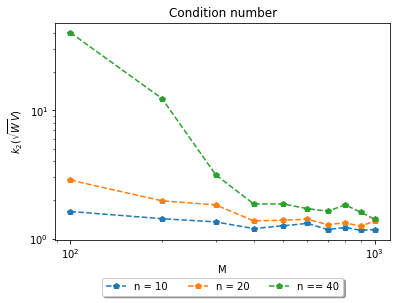

In [16]:
plt.loglog(M_grid, np.array(conds_CV_10), 'p--', label="n = 10")
plt.loglog(M_grid, np.array(conds_CV_20), 'p--', label="n = 20")
plt.loglog(M_grid, np.array(conds_CV_40), 'p--', label="n == 40")
plt.xlabel("M")
plt.ylabel("$k_2(\sqrt{W} V)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Condition number")
plt.show()

Plot of the errors for $n = 0$, $n = 10$, $n = 20$ and $n = 40$

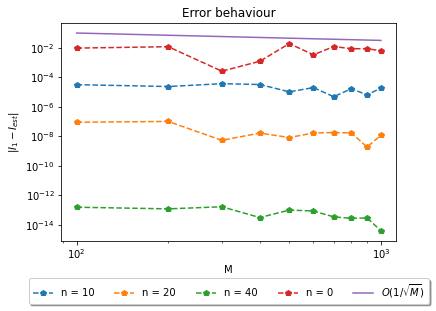

In [17]:
plt.loglog(M_grid, np.array(errors_CV_10), 'p--', label="n = 10")
plt.loglog(M_grid, np.array(errors_CV_20), 'p--', label="n = 20")
plt.loglog(M_grid, np.array(errors_CV_40), 'p--', label="n = 40")
plt.loglog(M_grid, np.array(errors_CV_0), 'p--', label="n = 0")
plt.loglog(M_grid, np.array(1/np.sqrt(M_grid)), label="$O(1/\sqrt{M})$")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

Estimation of $I_{1}$ by $MCLS$ estimator with importance sampling and $n$ as a function of $M$, here we start from smaller $M$ to observe the super-algebraic convergence in the case $n = [\frac{M}{\log(M)}]$

In [18]:
M_grid = 20 * np.arange(1, 5)
M_grid = np.concatenate([M_grid, 100 * np.arange(1, 11)])
errors_CV_root_M = []
errors_CV_M_halfs = []
errors_CV_M_over_log_M = []
errors_CV_M_log_M = []
conds_CV_root_M = []
conds_CV_M_halfs = []
conds_CV_M_over_log_M = []
for M in M_grid:
    _, error_CV_root_M, cond_CV_root_M, _ = importance_sampling_estimator(int(np.sqrt(M)), f, w, M, I_1)
    _, error_CV_M_halfs, cond_CV_M_halfs, _ = importance_sampling_estimator(int(M/2), f, w, M, I_1)
    _, error_CV_M_log_M, _, _ = importance_sampling_estimator(int(M*np.log10(M)), f, w, M, I_1)
    _, error_CV_M_over_log_M, cond_CV_M_over_log_M, _ = importance_sampling_estimator(int(M/np.log10(M)), f, w, M, I_1)
    errors_CV_root_M.append(error_CV_root_M)
    errors_CV_M_halfs.append(error_CV_M_halfs)
    errors_CV_M_log_M.append(error_CV_M_log_M)
    errors_CV_M_over_log_M.append(error_CV_M_over_log_M)
    conds_CV_root_M.append(cond_CV_root_M)
    conds_CV_M_halfs.append(cond_CV_M_halfs)
    conds_CV_M_over_log_M.append(cond_CV_M_over_log_M)

Accepted 2 out of 20
Concatenate 2 new samples
Currently we have 2 samples
Accepted 0 out of 20
Concatenate 0 new samples
Currently we have 2 samples
Accepted 3 out of 20
Concatenate 3 new samples
Currently we have 5 samples
Accepted 0 out of 20
Concatenate 0 new samples
Currently we have 5 samples
Accepted 0 out of 20
Concatenate 0 new samples
Currently we have 5 samples
Accepted 5 out of 20
Concatenate 5 new samples
Currently we have 10 samples
Accepted 3 out of 20
Concatenate 3 new samples
Currently we have 13 samples
Accepted 0 out of 20
Concatenate 0 new samples
Currently we have 13 samples
Accepted 2 out of 20
Concatenate 2 new samples
Currently we have 15 samples
Accepted 1 out of 20
Concatenate 1 new samples
Currently we have 16 samples
Accepted 2 out of 20
Concatenate 2 new samples
Currently we have 18 samples
Accepted 1 out of 20
Concatenate 1 new samples
Currently we have 19 samples
Accepted 2 out of 20
Constraint, taken only 1
Concatenate 1 new samples
Currently we have 20 

Accepted 10 out of 80
Concatenate 10 new samples
Currently we have 22 samples
Accepted 6 out of 80
Concatenate 6 new samples
Currently we have 28 samples
Accepted 6 out of 80
Concatenate 6 new samples
Currently we have 34 samples
Accepted 10 out of 80
Concatenate 10 new samples
Currently we have 44 samples
Accepted 10 out of 80
Concatenate 10 new samples
Currently we have 54 samples
Accepted 10 out of 80
Concatenate 10 new samples
Currently we have 64 samples
Accepted 8 out of 80
Concatenate 8 new samples
Currently we have 72 samples
Accepted 9 out of 80
Constraint, taken only 8
Concatenate 8 new samples
Currently we have 80 samples
Accepted 8 out of 80
Concatenate 8 new samples
Currently we have 8 samples
Accepted 9 out of 80
Concatenate 9 new samples
Currently we have 17 samples
Accepted 11 out of 80
Concatenate 11 new samples
Currently we have 28 samples
Accepted 12 out of 80
Concatenate 12 new samples
Currently we have 40 samples
Accepted 5 out of 80
Concatenate 5 new samples
Curre

Accepted 27 out of 300
Constraint, taken only 3
Concatenate 3 new samples
Currently we have 300 samples
Accepted 21 out of 300
Concatenate 21 new samples
Currently we have 21 samples
Accepted 25 out of 300
Concatenate 25 new samples
Currently we have 46 samples
Accepted 40 out of 300
Concatenate 40 new samples
Currently we have 86 samples
Accepted 23 out of 300
Concatenate 23 new samples
Currently we have 109 samples
Accepted 26 out of 300
Concatenate 26 new samples
Currently we have 135 samples
Accepted 30 out of 300
Concatenate 30 new samples
Currently we have 165 samples
Accepted 25 out of 300
Concatenate 25 new samples
Currently we have 190 samples
Accepted 22 out of 300
Concatenate 22 new samples
Currently we have 212 samples
Accepted 31 out of 300
Concatenate 31 new samples
Currently we have 243 samples
Accepted 41 out of 300
Concatenate 41 new samples
Currently we have 284 samples
Accepted 37 out of 300
Constraint, taken only 16
Concatenate 16 new samples
Currently we have 300 s

Accepted 48 out of 500
Concatenate 48 new samples
Currently we have 404 samples
Accepted 52 out of 500
Concatenate 52 new samples
Currently we have 456 samples
Accepted 49 out of 500
Constraint, taken only 44
Concatenate 44 new samples
Currently we have 500 samples
Accepted 40 out of 500
Concatenate 40 new samples
Currently we have 40 samples
Accepted 53 out of 500
Concatenate 53 new samples
Currently we have 93 samples
Accepted 47 out of 500
Concatenate 47 new samples
Currently we have 140 samples
Accepted 52 out of 500
Concatenate 52 new samples
Currently we have 192 samples
Accepted 41 out of 500
Concatenate 41 new samples
Currently we have 233 samples
Accepted 40 out of 500
Concatenate 40 new samples
Currently we have 273 samples
Accepted 41 out of 500
Concatenate 41 new samples
Currently we have 314 samples
Accepted 51 out of 500
Concatenate 51 new samples
Currently we have 365 samples
Accepted 38 out of 500
Concatenate 38 new samples
Currently we have 403 samples
Accepted 46 out 

Accepted 65 out of 700
Concatenate 65 new samples
Currently we have 229 samples
Accepted 64 out of 700
Concatenate 64 new samples
Currently we have 293 samples
Accepted 65 out of 700
Concatenate 65 new samples
Currently we have 358 samples
Accepted 67 out of 700
Concatenate 67 new samples
Currently we have 425 samples
Accepted 72 out of 700
Concatenate 72 new samples
Currently we have 497 samples
Accepted 65 out of 700
Concatenate 65 new samples
Currently we have 562 samples
Accepted 50 out of 700
Concatenate 50 new samples
Currently we have 612 samples
Accepted 62 out of 700
Concatenate 62 new samples
Currently we have 674 samples
Accepted 60 out of 700
Constraint, taken only 26
Concatenate 26 new samples
Currently we have 700 samples
Accepted 71 out of 800
Concatenate 71 new samples
Currently we have 71 samples
Accepted 76 out of 800
Concatenate 76 new samples
Currently we have 147 samples
Accepted 66 out of 800
Concatenate 66 new samples
Currently we have 213 samples
Accepted 69 out

Accepted 77 out of 1000
Concatenate 77 new samples
Currently we have 77 samples
Accepted 90 out of 1000
Concatenate 90 new samples
Currently we have 167 samples
Accepted 87 out of 1000
Concatenate 87 new samples
Currently we have 254 samples
Accepted 84 out of 1000
Concatenate 84 new samples
Currently we have 338 samples
Accepted 91 out of 1000
Concatenate 91 new samples
Currently we have 429 samples
Accepted 97 out of 1000
Concatenate 97 new samples
Currently we have 526 samples
Accepted 89 out of 1000
Concatenate 89 new samples
Currently we have 615 samples
Accepted 96 out of 1000
Concatenate 96 new samples
Currently we have 711 samples
Accepted 96 out of 1000
Concatenate 96 new samples
Currently we have 807 samples
Accepted 88 out of 1000
Concatenate 88 new samples
Currently we have 895 samples
Accepted 92 out of 1000
Concatenate 92 new samples
Currently we have 987 samples
Accepted 95 out of 1000
Constraint, taken only 13
Concatenate 13 new samples
Currently we have 1000 samples
Ac

Plot of the condition numbers for $n = [\sqrt{M}]$, $n = [\frac{M}{2}]$ and $n = [\frac{M}{\log(M)}]$

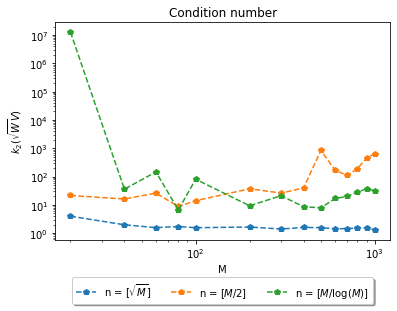

In [19]:
plt.loglog(M_grid, np.array(conds_CV_root_M), 'p--', label="n = [$\sqrt{M}$]")
plt.loglog(M_grid, np.array(conds_CV_M_halfs), 'p--', label="n = [$M/2$]")
plt.loglog(M_grid, np.array(conds_CV_M_over_log_M), 'p--', label="n = [$M/\log(M)$]")
plt.xlabel("M")
plt.ylabel("$k_2(\sqrt{W} V)$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Condition number")
plt.show()

Plot of the errors for $n = [\sqrt{M}]$, $n = [\frac{M}{2}]$ and $n = [\frac{M}{\log(M)}]$ and for $n = [M \log(M)]$

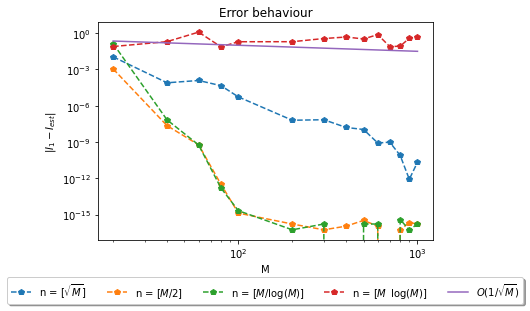

In [20]:
plt.loglog(M_grid, np.array(errors_CV_root_M), 'p--', label="n = [$\sqrt{M}$]")
plt.loglog(M_grid, np.array(errors_CV_M_halfs), 'p--', label="n = [$M/2$]")
plt.loglog(M_grid, np.array(errors_CV_M_over_log_M), 'p--', label="n = [$M / \log(M)$]")
plt.loglog(M_grid, np.array(errors_CV_M_log_M), 'p--', label="n = $[M \hspace{0.5} \log(M)]$")
plt.loglog(M_grid, np.array(1/np.sqrt(M_grid)), label="$O(1/\sqrt{M})$")
plt.xlabel("M")
plt.ylabel("$ |I_1-I_{est}| $")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.title("Error behaviour")
plt.show()

### Fitzhugh Nagumo Model

Plot of the solution to the Fitzhugh Nagumo Model for $a \sim U([0.6, 0.8])$ and $b \sim U([0.7, 0.9])$

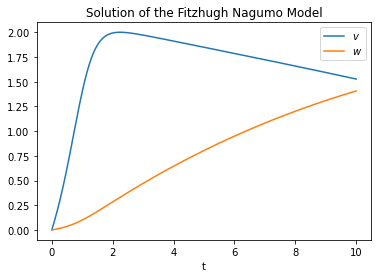

In [21]:
a = st.uniform.rvs(size=1)
b = st.uniform.rvs(size=1)
T = 10
N_T = 1000
dt = T / N_T
v, w = solve_Fitzhugh_Nagumo(a, b, dt, T)
plt.plot(np.linspace(0, T, N_T), v, label='$v$')
plt.plot(np.linspace(0, T, N_T), w, label='$w$')
plt.xlabel("t")
plt.legend(loc="best")
plt.title("Solution of the Fitzhugh Nagumo Model")
plt.show()

Compute the reference value for $I_2$

In [22]:
I_ref, _, estimated_error_ref = interpolation_estimator_Q(5, 10000, dt, T, 0, 0.05, QMC=False)

In [23]:
print(I_ref, estimated_error_ref)

0.11745134770628729 1.4382674906986435e-13


Crude Monte Carlo in the calculation of the average of $Q$

In [24]:
M_grid = 200 * np.arange(1, 26)
errors = []
for ind2, M in enumerate(M_grid):
    est, err = crude_monte_carlo_Q(M, dt, T, I_ref)
    errors.append(err)

$MCLS$ estimator for the average of $Q$

In [25]:
n_val = np.array([0, 1, 2, 3])
M_grid = 200 * np.arange(1, 26)
conf_intervals = np.zeros((len(n_val), len(M_grid)))
true_errors_MCLS = np.zeros((len(n_val), len(M_grid)))
for ind1, n in enumerate(n_val):
    for ind2, M in enumerate(M_grid):
        estimate_CV_Q, true_error_CV_Q, estimated_error_CV_Q = \
            interpolation_estimator_Q(n, M, dt, T, I_ref)
        conf_intervals[ind1, ind2] = estimated_error_CV_Q
        true_errors_MCLS[ind1, ind2] = true_error_CV_Q

Plot of the true errors and of the $95\%$ confidence intervals for $n = 0,1,2,3$ (that is, $\frac{(n+1)(n+2)}{2}$ basis functions)

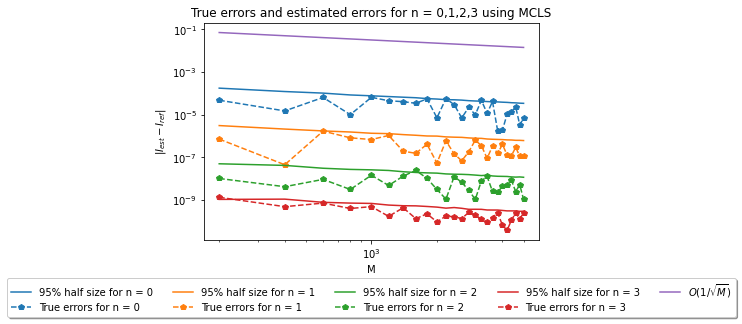

In [26]:
plt.loglog(M_grid, conf_intervals[0, :], 'tab:blue', label="95% half size for n = 0")
plt.loglog(M_grid, true_errors_MCLS[0, :], 'p--', label="True errors for n = 0")
plt.loglog(M_grid, conf_intervals[1, :], 'tab:orange', label="95% half size for n = 1")
plt.loglog(M_grid, true_errors_MCLS[1, :], 'p--', label="True errors for n = 1")
plt.loglog(M_grid, conf_intervals[2, :], 'tab:green', label="95% half size for n = 2")
plt.loglog(M_grid, true_errors_MCLS[2, :], 'p--', label="True errors for n = 2")
plt.loglog(M_grid, conf_intervals[3, :], 'tab:red', label="95% half size for n = 3")
plt.loglog(M_grid, true_errors_MCLS[3, :], 'p--', label="True errors for n = 3")
plt.loglog(M_grid, np.sqrt(1/M_grid), label="$O(1/\sqrt{M})$")
plt.xlabel("M")
plt.ylabel("$|I_{est}-I_{ref}|$")
plt.title("True errors and estimated errors for n = 0,1,2,3 using MCLS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.show()

QMCLS estimator for the average of $Q$ using the Sobol sequence as low discrepancy set

In [27]:
n_val = np.array([0, 1, 2, 3])
M_grid = 200 * np.arange(1, 26)
conf_intervals = np.zeros((len(n_val), len(M_grid)))
true_errors_QMCLS = np.zeros((len(n_val), len(M_grid)))
for ind1, n in enumerate(n_val):
    for ind2, M in enumerate(M_grid):
        estimate_CV_Q, true_error_CV_Q, estimated_error_CV_Q = \
            interpolation_estimator_Q(n, M, dt, T, I_ref, QMC=True)
        conf_intervals[ind1, ind2] = estimated_error_CV_Q
        true_errors_QMCLS[ind1, ind2] = true_error_CV_Q

Doing 0 200
Doing 0 400
Doing 0 600
Doing 0 800
Doing 0 1000
Doing 0 1200
Doing 0 1400
Doing 0 1600
Doing 0 1800
Doing 0 2000
Doing 0 2200
Doing 0 2400
Doing 0 2600
Doing 0 2800
Doing 0 3000
Doing 0 3200
Doing 0 3400
Doing 0 3600
Doing 0 3800
Doing 0 4000
Doing 0 4200
Doing 0 4400
Doing 0 4600
Doing 0 4800
Doing 0 5000
Doing 1 200
Doing 1 400
Doing 1 600
Doing 1 800
Doing 1 1000
Doing 1 1200
Doing 1 1400
Doing 1 1600
Doing 1 1800
Doing 1 2000
Doing 1 2200
Doing 1 2400
Doing 1 2600
Doing 1 2800
Doing 1 3000
Doing 1 3200
Doing 1 3400
Doing 1 3600
Doing 1 3800
Doing 1 4000
Doing 1 4200
Doing 1 4400
Doing 1 4600
Doing 1 4800
Doing 1 5000
Doing 2 200
Doing 2 400
Doing 2 600
Doing 2 800
Doing 2 1000
Doing 2 1200
Doing 2 1400
Doing 2 1600
Doing 2 1800
Doing 2 2000
Doing 2 2200
Doing 2 2400
Doing 2 2600
Doing 2 2800
Doing 2 3000
Doing 2 3200
Doing 2 3400
Doing 2 3600
Doing 2 3800
Doing 2 4000
Doing 2 4200
Doing 2 4400
Doing 2 4600
Doing 2 4800
Doing 2 5000
Doing 3 200
Doing 3 400
Doing 3 600
D

Plot of the true errors of the $QMCLS$ results for $n = 0,1,2$ (namely $\frac{(n+1)(n+2)}{2}$ basis functions)

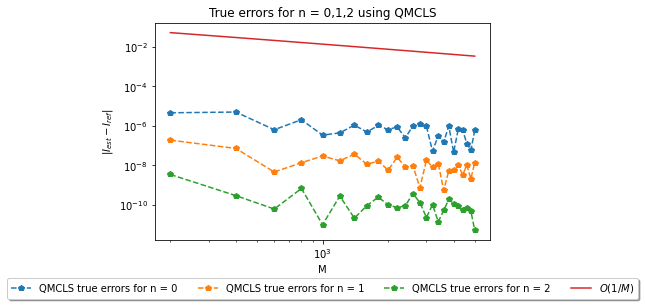

In [31]:
plt.loglog(M_grid, true_errors_QMCLS[0, :], 'p--', label="QMCLS true errors for n = 0")
plt.loglog(M_grid, true_errors_QMCLS[1, :], 'p--', label="QMCLS true errors for n = 1")
plt.loglog(M_grid, true_errors_QMCLS[2, :], 'p--', label="QMCLS true errors for n = 2")
plt.loglog(M_grid, 1/M_grid, label="$O(1/M)$")
plt.xlabel("M")
plt.ylabel("$|I_{est}-I_{ref}|$")
plt.title("True errors for n = 0,1,2 using QMCLS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.show()